In [1]:
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *

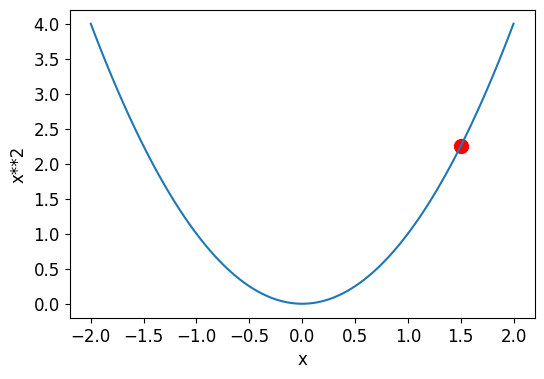

In [2]:
def f(x): return x**2

plot_function (f, 'x', 'x**2')
plt.scatter(1.5, f(1.5), color='red', s=100, label='f(1.5)')

In [3]:
# Compute gradients for the quadratic function
xt = torch.tensor([1.5], requires_grad=True)
yt = f(xt) 
yt

tensor([2.2500], grad_fn=<PowBackward0>)

In [4]:
yt.backward()
xt.grad

tensor([3.])

In [5]:
# A good example of an implmentation of gradient descent
time = torch.arange(0,20).float(); time
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

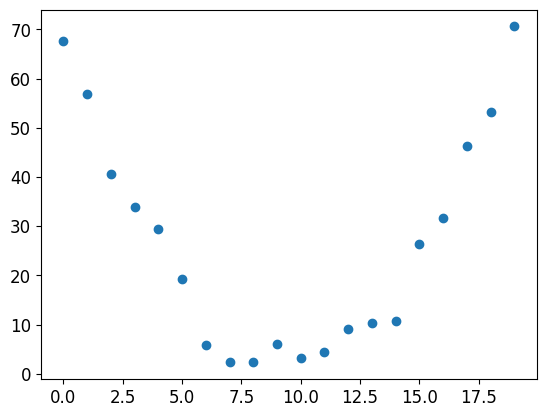

In [9]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed, label='speed')

In [10]:
def vel(t, params):
    a, b, c = params
    return a*t**2 + b*t + c

def mse(actual, predicted):
    return ((actual - predicted)**2).mean()

In [12]:
params = torch.randn(3).requires_grad_()
params# Random parameters

tensor([-0.0909, -1.3297, -0.5426], requires_grad=True)

In [13]:
orig_params = params.clone()

In [14]:
pred = vel(time, params)

In [20]:
def show_preds(pred,ax = None):
    if ax is None:
        ax = plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(pred), color='red', label='predicted')
    ax.set_ylim(-300, 100)  
        

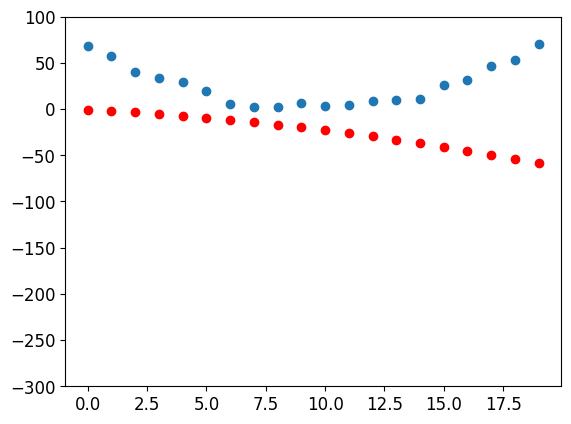

In [21]:
show_preds(pred)

In [22]:
loss = mse(speed, pred)
loss

tensor(3522.0808, grad_fn=<MeanBackward0>)

In [23]:
loss.backward()
loss

tensor(3522.0808, grad_fn=<MeanBackward0>)

In [24]:
# Pick 1e -5 as the learning rate
params.grad * 1e-5


tensor([-0.1790, -0.0117, -0.0010])

In [ ]:
# Update parameters using gradient descent
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None